In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [11]:
#  LOAD AND SPLIT DATASET
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
print(x_train.shape)
# Normalize pixel values to be between 0 and 1
# train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(50000, 32, 32, 3)


[3]
x_train shape: (50000, 32, 32, 3)


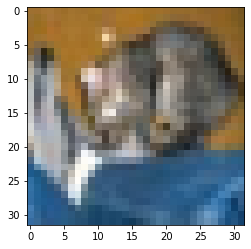

In [12]:
img = plt.imshow(x_test[0])
print(y_test[0])
print('x_train shape:', x_train.shape)


In [13]:
from tensorflow import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [15]:
#Downloaded the dataset and visualize the images
#Changed the label to one-hot encodings
#Scale the image pixel values to take between 0 and 1

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [17]:
#we call an ‘empty’ sequential model
model = Sequential()

In [18]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

In [19]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))


In [20]:
model.add(MaxPooling2D(pool_size=(2, 2)))


In [21]:
model.add(Dropout(0.25))


In [22]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [23]:
model.add(Flatten())


In [24]:
model.add(Dense(512, activation='relu'))


In [25]:
model.add(Dropout(0.5))


In [26]:
model.add(Dense(10, activation='softmax'))


In [27]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [79]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=500, epochs=10, 
           validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 122s 3ms/sample - loss: 0.8007 - accuracy: 0.7177 - val_loss: 0.7937 - val_accuracy: 0.7250
Epoch 2/10
40000/40000 [==============================] - 122s 3ms/sample - loss: 0.7541 - accuracy: 0.7305 - val_loss: 0.7460 - val_accuracy: 0.7412
Epoch 3/10
40000/40000 [==============================] - 129s 3ms/sample - loss: 0.7155 - accuracy: 0.7475 - val_loss: 0.7378 - val_accuracy: 0.7460
Epoch 4/10
40000/40000 [==============================] - 131s 3ms/sample - loss: 0.6804 - accuracy: 0.7605 - val_loss: 0.7211 - val_accuracy: 0.7515
Epoch 5/10
40000/40000 [==============================] - 132s 3ms/sample - loss: 0.6470 - accuracy: 0.7711 - val_loss: 0.7181 - val_accuracy: 0.7552
Epoch 6/10
40000/40000 [==============================] - 132s 3ms/sample - loss: 0.6110 - accuracy: 0.7843 - val_loss: 0.6907 - val_accuracy: 0.7612
Epoch 7/10
40000/40000 [==========================

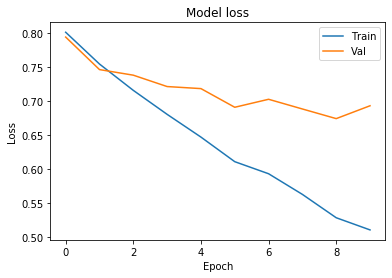

In [80]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

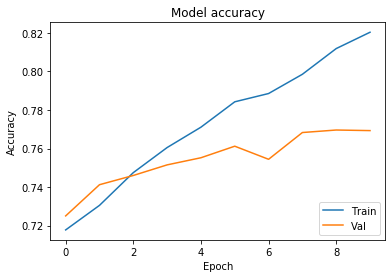

In [81]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]


 6080/10000 [=================>............] - ETA: 3s - loss: 0.7130 - accuracy: 0.7676

In [49]:
model.save('my_cifar10_model.h5')


In [53]:
#from keras.models import load_model
#model = load_model('my_cifar10_model.h5')

In [68]:
my_image = plt.imread("cat.jpg")


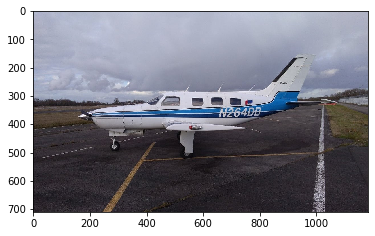

In [69]:
plt.imshow(my_image)

In [70]:
from skimage.transform import resize


In [71]:
my_image_resized = resize(my_image, (32,32,3))


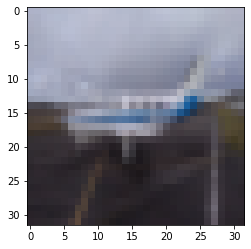

In [72]:
img = plt.imshow(my_image_resized)


In [73]:
import numpy as np


In [74]:
probabilities = model.predict(np.array( [my_image_resized,] ))


In [75]:
probabilities


array([[5.3883070e-01, 1.5456886e-02, 3.1400474e-03, 2.2144070e-04,
        1.7107745e-03, 3.8340582e-05, 2.8172325e-04, 1.3868682e-04,
        4.3485412e-01, 5.3272960e-03]], dtype=float32)

In [76]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: airplane -- Probability: 0.5388307
Second most likely class: ship -- Probability: 0.43485412
Third most likely class: automobile -- Probability: 0.015456886
Fourth most likely class: truck -- Probability: 0.005327296
Fifth most likely class: bird -- Probability: 0.0031400474


In [78]:
import os
model_name = 'keras_cifar10_trained_model(Acc = 71%).h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /Users/ashutoshjha/Desktop/Projects/ML-DL/ML/saved_models/keras_cifar10_trained_model(Acc = 71%).h5 
